In [174]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
l = torch.linspace(-10, 10, 201)
A, B = torch.meshgrid(l, l, indexing='ij')

Q = 3*A**2 + B**3 - 6

$$
Q = 3a^2 + b^3 - 6
$$

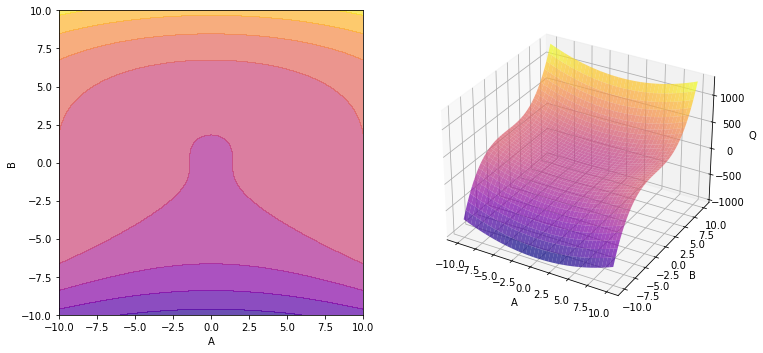

In [176]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax.contourf(A, B, Q, cmap='plasma', alpha=.7)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.axis('square')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(A, B, Q, cmap='plasma', alpha=.7)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Q')
plt.show()

a.is_leaf = True
b.is_leaf = True
Q.is_leaf = False


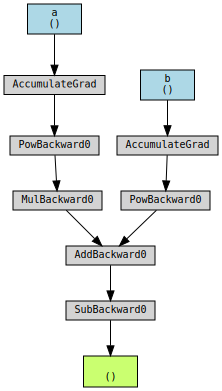

In [177]:
from torchviz import make_dot

a = torch.tensor(1., requires_grad=True)
b = torch.tensor(1., requires_grad=True)
Q = 3*a**2 + b**3 - 6

print(f'{a.is_leaf = }')
print(f'{b.is_leaf = }')
print(f'{Q.is_leaf = }')

make_dot(Q, params={'a':a, 'b':b})

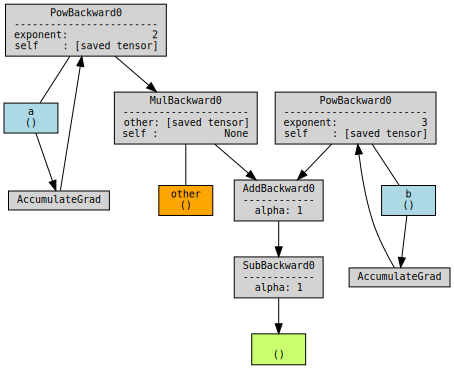

In [178]:
make_dot(Q, params={'a':a, 'b':b}, show_attrs=True, show_saved=True)

$$
Q = 3a^2 + b^3 - 6
$$

In [179]:
import inflect
inflector = inflect.engine()

print(f"{f'before Q.backward()':=^50}")
print(f'{a.grad = }')
print(f'{b.grad = }')
print()

for i in range(1, 3):
    if a.grad is not None: a.grad.zero_()
    if b.grad is not None: b.grad.zero_()
    print(f"{f'{inflector.ordinal(i)} .zero_grad()':=^50}")
    for j in range(1, 4):
        Q.backward(retain_graph=True)
        print(f"{f'{inflector.ordinal(j)} Q.backward(retain_graph=True)':-^50}")
        print(f'{a.grad = }')
        print(f'{b.grad = }')
        print()

a.grad, b.grad = None, None

===============before Q.backward()================
a.grad = None
b.grad = None

=================1st .zero_grad()=================
--------1st Q.backward(retain_graph=True)---------
a.grad = tensor(6.)
b.grad = tensor(3.)

--------2nd Q.backward(retain_graph=True)---------
a.grad = tensor(12.)
b.grad = tensor(6.)

--------3rd Q.backward(retain_graph=True)---------
a.grad = tensor(18.)
b.grad = tensor(9.)

=================2nd .zero_grad()=================
--------1st Q.backward(retain_graph=True)---------
a.grad = tensor(6.)
b.grad = tensor(3.)

--------2nd Q.backward(retain_graph=True)---------
a.grad = tensor(12.)
b.grad = tensor(6.)

--------3rd Q.backward(retain_graph=True)---------
a.grad = tensor(18.)
b.grad = tensor(9.)



In [181]:
model = nn.Linear(1,1)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
optimizer.zero_grad()